In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from download import download

np.set_printoptions(suppress=True)

In [2]:
ticker = input("Ticker: ")
apikey = open("apikey", "r").readline()
download(ticker, apikey)

Ticker: SPY


In [3]:
dat = pd.read_csv("./data/{}.csv" .format(ticker))
dat = dat.loc[::-1].reset_index().drop(columns=["index"])
print(dat)

            date       open       high         low     close    adjClose  \
0     2000-01-03  148.25000  148.25000  143.875000  145.4375   94.946426   
1     2000-01-04  143.53125  144.06250  139.640625  139.7500   91.233467   
2     2000-01-05  139.93750  141.53125  137.250000  140.0000   91.396667   
3     2000-01-06  139.62500  141.50000  137.750000  137.7500   89.927795   
4     2000-01-07  140.31250  145.75000  140.062500  145.7500   95.150459   
...          ...        ...        ...         ...       ...         ...   
5894  2023-06-07  428.44000  429.62000  426.110000  426.5500  426.549988   
5895  2023-06-08  426.62000  429.60000  425.820000  429.1300  429.130005   
5896  2023-06-09  429.96000  431.99000  428.870000  429.9000  429.899994   
5897  2023-06-12  430.92000  433.88000  430.170000  433.8000  433.799988   
5898  2023-06-13  435.32000  437.33000  434.630000  436.6600  436.660004   

        volume  unadjustedVolume   change  changePercent    vwap  \
0      8164300     

SPY P&L Statistics
                 0
count  5898.000000
mean      0.000336
std       0.012456
min      -0.109424
25%      -0.004807
50%       0.000653
75%       0.006019
max       0.145198


[Text(0.5, 0, 'SPY P&L'), Text(0, 0.5, 'Frequency')]

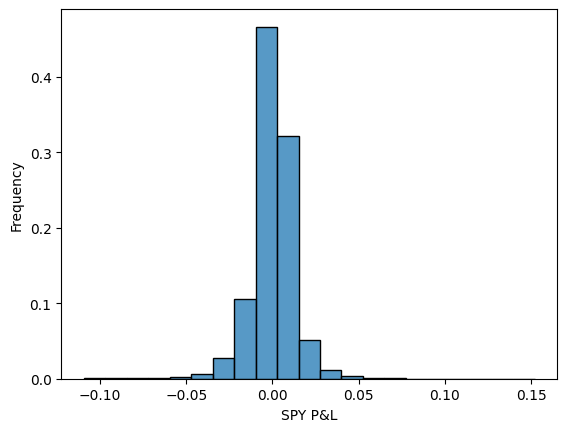

In [4]:
returns = []
for t in range(1, dat.shape[0]):
    returns.append((dat["adjClose"][t] - dat["adjClose"][t-1]) / dat["adjClose"][t-1])
returns = np.array(returns)

print("{} P&L Statistics" .format(ticker))
print(pd.DataFrame(returns).describe())

ax = sns.histplot(data=returns, binwidth=np.std(returns), stat="probability")
ax.set(xlabel="{} P&L" .format(ticker), ylabel="Frequency")

In [5]:
N = 100
s0 = dat["adjClose"].iloc[-1]
mu = returns.mean()
sigma = np.std(returns)
drift = mu + 0.5 * sigma**2

print("N = {}" .format(N))
print("s0 = {}" .format(s0))
print("mu = {}" .format(mu))
print("sigma = {}" .format(sigma))
print("drift = {}" .format(drift))

N = 100
s0 = 436.660004
mu = 0.00033636703566137854
sigma = 0.012455426601985304
drift = 0.0004139358615801001


In [6]:
epoch = 1000
sample_path = []
for e in range(epoch):
    shock = np.random.normal(0, 1, N)
    brownian = np.zeros(N+1)
    brownian[1:] = shock
    for t in range(1, N+1):
        brownian[t] += brownian[t-1]
    
    path = np.zeros(N+1)
    path[0] = s0
    for t in range(1, N+1):
        path[t] = s0 * np.exp(drift * t + sigma * brownian[t])
        
    sample_path.append(path)
    #print("#{}:\nshock = {}\nbrownian = {}\npath = {}\n" .format(e, shock, brownian, path))

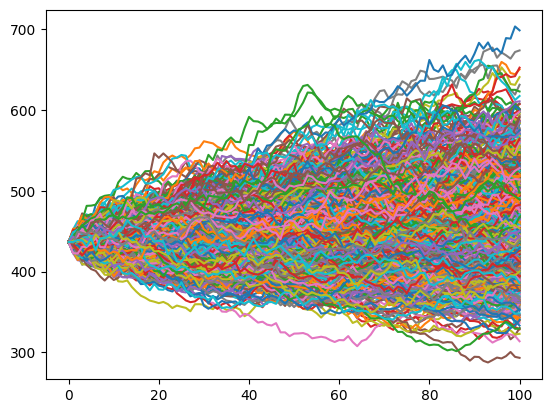

In [7]:
sample_path = np.array(sample_path)
plt.figure()
for path in sample_path:
    plt.plot(path)
plt.show()

SPY GBM Prices
                   0
count  100000.000000
mean      447.622985
std        41.378509
min       287.558725
25%       422.441228
50%       442.986935
75%       468.914434
max       703.562500


[Text(0.5, 0, 'SPY GBM Prices'), Text(0, 0.5, 'Frequency')]

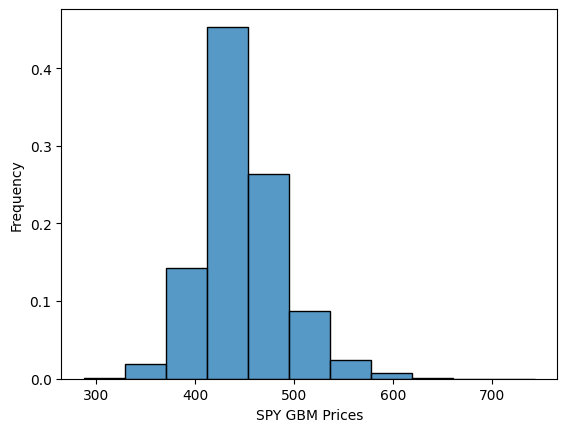

In [8]:
prices = sample_path.flatten()
prices = prices[prices != s0]

print("{} GBM Prices" .format(ticker))
print(pd.DataFrame(prices).describe())

ax = sns.histplot(data=prices, binwidth=np.std(prices), stat="probability")
ax.set(xlabel="{} GBM Prices" .format(ticker), ylabel="Frequency")

In [9]:
up = sum([price > s0 for price in prices]) / prices.shape[0]
down = 1.00 - up
print("P(s > s0) = {:.4f}; P(s < s0) = {:.4f}" .format(up, down))

P(s > s0) = 0.5827; P(s < s0) = 0.4173
